In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm

In [ ]:
!pip install -U transformers
!pip install sentencepiece

In [ ]:
!nvidia-smi

In [ ]:
from hashlib import new


for i in range(0, 1992):
    folder_name = train['source'][i]
    new_path = os.path.join(folder_name)
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    number_files = len(os.listdir(new_path))
    file_path = new_path + "/" + str(format(number_files, '05d')) + ".txt"
    with open(file_path, 'w') as f:
        f.write(dataset['Question'][i])

In [ ]:
import json
import pandas as pd
df = pd.read_json('/content/drive/MyDrive/BTP/data/train.json')


In [ ]:
df.head()

,source,source_labels,rouge_scores,paper_id,target,title
0,[Due to the success of deep learning to solvin...,"[0, 0, 0, 0, 1, 0]","[0.30188678746885, 0.37209301838831804, 0.6037...",SysEexbRb,[We provide necessary and sufficient analytica...,Critical Points of Linear Neural Networks: Ana...
1,[The backpropagation (BP) algorithm is often t...,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.130434779206049, 0.14285713922902...",SygvZ209F7,"[Biologically plausible learning algorithms, p...",Biologically-Plausible Learning Algorithms Can...
2,"[We introduce the 2-simplicial Transformer, an...","[0, 1]","[0.333333328395061, 0.8888888839111111]",rkecJ6VFvr,[We introduce the 2-simplicial Transformer and...,Logic and the 2-Simplicial Transformer
3,"[We present Tensor-Train RNN (TT-RNN), a novel...","[0, 0, 0, 1, 0, 0]","[0.066666662222222, 0.06451612466181, 0.060606...",HJJ0w--0W,[Accurate forecasting over very long time hori...,Long-term Forecasting using Tensor-Train RNNs
4,[Recent efforts on combining deep models with ...,"[0, 1, 0, 0, 0, 0, 0]","[0.27777777279320903, 0.571428566658163, 0.095...",HyH9lbZAW,[We propose a variational message-passing algo...,Variational Message Passing with Structured In...


In [ ]:
df1 = df[['source', 'target', 'title']]
df2 = df[["rouge_scores"]]

In [ ]:
df1.head()

,source,target,title
0,[Due to the success of deep learning to solvin...,[We provide necessary and sufficient analytica...,Critical Points of Linear Neural Networks: Ana...
1,[The backpropagation (BP) algorithm is often t...,"[Biologically plausible learning algorithms, p...",Biologically-Plausible Learning Algorithms Can...
2,"[We introduce the 2-simplicial Transformer, an...",[We introduce the 2-simplicial Transformer and...,Logic and the 2-Simplicial Transformer
3,"[We present Tensor-Train RNN (TT-RNN), a novel...",[Accurate forecasting over very long time hori...,Long-term Forecasting using Tensor-Train RNNs
4,[Recent efforts on combining deep models with ...,[We propose a variational message-passing algo...,Variational Message Passing with Structured In...


In [ ]:
df2.to_csv('rouge.csv')

In [ ]:
df2.head()

In [ ]:
print(df2.to_string())

In [ ]:
# from pandas.io.json import json_normalize #package for flattening json in pandas df

# #load json object
# with open('/content/drive/MyDrive/BTP/Multi-XScience-master/data/test.json') as f:
#     d = json.load(f)

# # with open('/content/drive/MyDrive/BTP/SciTLDR-Data/SciTLDR-A/train.jsonl') as f:
# #     d = json.load(f)

# #lets put the data into a pandas df
# #clicking on raw_nyc_phil.json under "Input Files"
# #tells us parent node is 'programs'
# # nycphil = json_normalize(d[1])
# nycphil.head(3)

In [ ]:
from transformers import XLNetConfig, XLNetModel, XLNetTokenizer

# # Initializing a XLNet configuration
# configuration = XLNetConfig()

# # Initializing a model from the configuration
# model = XLNetModel(configuration)

# # Accessing the model configuration
# configuration = model.config

In [ ]:
# tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

In [ ]:
# model = transformers.XLNetLMHeadModel.from_pretrained("xlnet-base-cased")

In [ ]:
## Load Dataset
## https://huggingface.co/datasets/scitldr

from datasets import load_dataset

dataset = load_dataset("scitldr")


### reddit


In [ ]:
## Bart Implementation for Reddit dataset

from transformers import pipeline
summarizer = pipeline('summarization', model='facebook/bart-large-cnn', tokenizer='facebook/bart-large-cnn')
text = ".".join(comment_section)
summarizer(text, min_length = round(0.1 * len(text.split(' '))), max_length = round(0.2 * len(text.split(' '))), do_sample=False)

# [{'summary_text': "england would fall before there comes a day when the queen doesn't have tea.
#   She also regularly has wine with her meals. When someone gets to 100 years old in england they get a letter from the queen."}]

In [ ]:
# chunked_model_config is a dictionary initialized from command line arguments. Most fields
# are self-explanatory or can be inferred from the ChunkedTextDataset docs.
# Get the datasets
train_set = ChunkedTextDataset(
    os.path.join(input_folder, "train.pt"),
    tokenizer,
    chunked_model_config["max_seq_len"],
    chunked_model_config["predict_len"],
    pad_left=True,
)
val_set = ChunkedTextDataset(
    os.path.join(input_folder, "val.pt"),
    tokenizer,
    chunked_model_config["max_seq_len"],
    chunked_model_config["predict_len"],
    pad_left=True,
)
train_loader = train_set.get_dataloader(batch_size, num_workers=0)
val_loader = val_

## T5

In [ ]:
!pip install cloud-tpu-client==0.10 torch==1.11.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl


In [ ]:
!git clone https://github.com/huggingface/transformers.git
!pip install ./transformers

In [ ]:
!pip install wandb
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
import wandb
# from transformers import AutoTokenizer,T5ForConditionalGeneration
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig
from datasets import Dataset
from sklearn.model_selection import train_test_split

from transformers import Trainer, TrainingArguments
from transformers.optimization import Adafactor,AdafactorSchedule
import torch_xla
import torch_xla.core.xla_model as xm

import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
!pip install nltk rouge_score
!pip install datasets

In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["I really loved reading the Hunger Games"]
references = ["I loved reading the Hunger Games"]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)),
 'rouge2': AggregateScore(low=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272), mid=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272), high=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272)),
 'rougeL': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)),
 'rougeLsum': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.92307692307

In [ ]:
dev = xm.xla_device()
torch.set_default_tensor_type('torch.FloatTensor')

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/BTP/data/train.csv")

train_df['source'] = train_df['source'].map(str)
train_df['target'] = train_df['target'].map(str)

In [ ]:
train_df

In [ ]:
dev_seen_df = pd.read_csv("/content/drive/MyDrive/BTP/data/dev.csv")

dev_seen_df['source'] = dev_seen_df['source'].map(str)
dev_seen_df['target'] = dev_seen_df['target'].map(str)

In [ ]:
dev_seen_df

In [ ]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

max_source = 512
max_target = 190

print(max_source, max_target)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

512 190


In [ ]:
def tokenize(batch):
    tokenized_input = tokenizer(batch['source'], padding='max_length', truncation=True, max_length=max_source)
    tokenized_label = tokenizer(batch['target'], padding='max_length', truncation=True, max_length=max_target)

    tokenized_input['labels'] = tokenized_label['input_ids']

    return tokenized_input

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(dev_seen_df)

train_dataset = train_dataset.map(tokenize, batched=True, batch_size=8)
val_dataset = val_dataset.map(tokenize, batched=True, batch_size=len(val_dataset))

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
output_dir = './'

  0%|          | 0/249 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--bart-large/snapshots/cb48c1365bd826bd521f650dc2e0940aee54720c/config.json
Model config BartConfig {
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartModel"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
 

In [ ]:
training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=10,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    eval_accumulation_steps=1,
    prediction_loss_only=True,
    learning_rate=0.001,
    evaluation_strategy='steps',
    save_steps=5000,
    save_total_limit=1,
    logging_steps=1000, # How often to log loss to wandb
    eval_steps=1000, # How often to run evaluation on the val_set
    logging_first_step=False, # Whether to log also the very first training step to wandb
    load_best_model_at_end=True,
    metric_for_best_model="loss",
    greater_is_better=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.train()
trainer.save_model(output_dir + '/model')


The following columns in the training set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: title, Unnamed: 0, target, source. If title, Unnamed: 0, target, source are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1992
  Num Epochs = 10
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 9960
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Step,Training Loss,Validation Loss
1000,1.163700,11.869658
2000,1.140900,11.904290
3000,1.247900,8.617752
4000,1.189900,8.373528


The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: title, Unnamed: 0, target, source. If title, Unnamed: 0, target, source are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 619
  Batch size = 2
The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: title, Unnamed: 0, target, source. If title, Unnamed: 0, target, source are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 619
  Batch size = 2
The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: title, Unnamed: 0, target, source. If title, Unnamed: 0, target, source are not expected 

Step,Training Loss,Validation Loss
1000,1.163700,11.869658
2000,1.140900,11.904290
3000,1.247900,8.617752
4000,1.189900,8.373528
5000,1.154400,9.129109
6000,1.132000,9.087417
7000,1.122400,10.413335
8000,1.115100,10.737088
9000,1.098800,10.209774


The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: title, Unnamed: 0, target, source. If title, Unnamed: 0, target, source are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 619
  Batch size = 2
Saving model checkpoint to ./checkpoint-5000
Configuration saved in ./checkpoint-5000/config.json
Model weights saved in ./checkpoint-5000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: title, Unnamed: 0, target, source. If title, Unnamed: 0, target, source are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 619
  Batch size = 2
The following columns in the evaluation set don't have a corresponding argume

## BART


In [ ]:
!nvidia-smi


In [ ]:
!pip install ohmeow-blurr -q
!pip install bert-score -q

In [ ]:
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [ ]:
!pip install cloud-tpu-client==0.10 torch==1.12.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.12-cp37-cp37m-linux_x86_64.whl

In [ ]:
# imports pytorch
import torch

# imports the torch_xla package
import torch_xla
import torch_xla.core.xla_model as xm

In [ ]:
dev = xm.xla_device()
torch.set_default_tensor_type('torch.FloatTensor')

In [ ]:
#Get data
# df = pd.read_csv('/content/drive/MyDrive/BTP/data/trainfinal.csv', error_bad_lines=False, sep=',')
df = pd.read_csv('/content/drive/MyDrive/BTP/data/scitldr-a_unique.csv', error_bad_lines=False, sep=',')
df = df.dropna().reset_index()

#Select part of data we want to keep
# df = df[(df['language']=='english') & (df['type']=='bs')].reset_index()
df = df[['source','target']]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df.drop_duplicates(subset = "source")


In [ ]:
df.to_csv('scitldr-a_unique.csv')

In [ ]:
df.describe()

,source,target
count,3226,3226
unique,3226,3225
top,"Due to the success of deep learning to solving a variety of challenging machine learning tasks, there is a rising interest in understanding loss functions for training neural networks from a theoretical aspect.', 'Particularly, the properties of critical points and the landscape around them are of importance to determine the convergence performance of optimization algorithms.', 'In this paper, we provide a necessary and sufficient characterization of the analytical forms for the critical points (as well as global minimizers) of the square loss functions for linear neural networks.', 'We sh...","GAN representations are examined in detail, and sets of representation units are found that control the generation of semantic concepts in the output."
freq,1,2


In [ ]:
articles = df.head(3000)
# articles.head()

In [ ]:
#Import the pretrained model
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, model_cls=BartForConditionalGeneration)

In [ ]:
#Create mini-batch and define parameters
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(hf_arch, hf_config, hf_tokenizer, hf_model,
    task='summarization',
    text_gen_kwargs =
 {'max_length': 512,'min_length': 64,'do_sample': False, 'early_stopping': True, 'num_beams': 4, 'temperature': 1.0,
  'top_k': 50, 'top_p': 1.0, 'repetition_penalty': 1.0, 'bad_words_ids': None, 'bos_token_id': 0, 'pad_token_id': 1,
 'eos_token_id': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1, 'decoder_start_token_id': 2, 'use_cache': True, 'num_beam_groups': 1,
 'diversity_penalty': 0.0, 'output_attentions': False, 'output_hidden_states': False, 'output_scores': False,
 'return_dict_in_generate': False, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2, 'remove_invalid_values': False})


In [ ]:
#Prepare data for training
blocks = (Seq2SeqTextBlock(batch_tokenize_tfm = hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('source'), get_y=ColReader('target'), splitter=RandomSplitter())

In [ ]:
dls = dblock.dataloaders(articles, bs = 2)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3543: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  "`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your "


In [ ]:
#Define performance metrics
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'fr' },
            'returns': ["precision", "recall", "f1"]}}

#Model
model = BaseModelWrapper(hf_model)
# model = BaseModelWrapper(hf_model).to(dev)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

#Specify training
learn = Learner(dls, model,
                opt_func=ranger,loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

#Create optimizer with default hyper-parameters
learn.create_opt()
learn.freeze()

SuggestedLRs(valley=0.0005754399462603033)

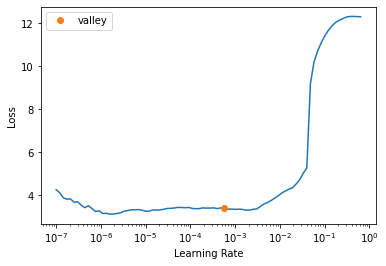

In [ ]:
learn.lr_find()

It's also not a bad idea to run a batch through your model and make sure the shape of what goes in, and comes out, looks right.

In [ ]:
b = dls.one_batch()
preds = learn.model(b[0])
len(preds),preds[0], preds[1].shape

(3,
 tensor(3.5680, device='cuda:0', grad_fn=<NllLossBackward0>),
 torch.Size([2, 39, 50264]))

In [ ]:
# model = MyModel(num_classes).to(device)
# optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)
# output_model = './models/model_xlnet_mid.pth'

# # save
# def save(model, optimizer):
#     # save
#     torch.save({
#         'model_state_dict': model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict()
#     }, output_model)

# save(model, optimizer)

# # load
# checkpoint = torch.load(output_model, map_location='cpu')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load Model
model.load_state_dict(torch.load('/content/drive/MyDrive/BTP/model/modelnew'))

<All keys matched successfully>

In [ ]:
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
#Training
learn.fit_one_cycle(8, lr_max=8e-4, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time


In [ ]:
learn.recorder.plot_metrics()

In [ ]:
# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BTP/Models/modelscitldr-a')

In [ ]:
# Load Model
model.load_state_dict(torch.load('/content/drive/MyDrive/BTP/Models/model'))

In [ ]:
#Training
learn.fit_one_cycle(5, lr_max=3e-5, cbs=fit_cbs)

In [ ]:
# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BTP/Models/model'+str(1))

In [ ]:
# Load Model
model.load_state_dict(torch.load('/content/drive/MyDrive/BTP/Models/model'+str(1)))

In [ ]:
#Training
learn.fit_one_cycle(5, lr_max=3e-5, cbs=fit_cbs)

In [ ]:
# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BTP/Models/model'+str(2))

In [ ]:
# Load Model
model.load_state_dict(torch.load('/content/drive/MyDrive/BTP/Models/model'+str(2)))

In [ ]:
#Training
learn.fit_one_cycle(5, lr_max=3e-5, cbs=fit_cbs)

In [ ]:
# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BTP/Models/model'+str(3))

In [ ]:
# Load Model
model.load_state_dict(torch.load('/content/drive/MyDrive/BTP/Models/model'+str(3)))

In [ ]:
#Training
learn.fit_one_cycle(5, lr_max=3e-5, cbs=fit_cbs)

In [ ]:
# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BTP/Models/model'+3)

In [ ]:
outputs = learn.blurr_generate(text_to_generate, early_stopping=False, num_return_sequences=1)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

## Try


In [ ]:
article = """Due to the success of deep learning to solving \\\a variety of challenging machine learning tasks, there is a rising interest in understanding loss functions for
training neural networks from a theoretical aspect.", "Particularly, the properties of critical points and the landscape around them are of importance to determine the convergence
performance of optimization algorithms.", "In this paper, we provide a necessary and sufficient characterization of the analytical forms for the critical points (as well as global
 minimizers) of the square loss functions for linear neural networks.", "We show that the analytical forms of the critical points characterize the values of the corresponding loss
  functions as well as the necessary and sufficient conditions to achieve global minimum.", "Furthermore, we exploit the analytical forms of the critical points to characterize the
   landscape properties for the loss functions of linear neural networks and shallow ReLU networks.", "One particular conclusion is that: While the loss function of linear networks
    has no spurious local minimum, the loss function of one-hidden-layer nonlinear networks with ReLU activation function does have local minimum that is not global minimum."""

In [ ]:
from transformers import pipeline

def text_summarization_pipeline(article,max_len):
  summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
  return summarizer(article, max_length=max_len, min_length=30, do_sample=False)[0]['summary_text']

In [ ]:
text_summarization_pipeline(article,185)

'There is a rising interest in understanding loss functions for  training neural networks from a theoretical aspect. The properties of critical points and the landscape around them are of importance to determine the convergence performance of optimization algorithms.'

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

def text_summarization_BART(article,max_len):

  inputs = tokenizer([article], return_tensors='pt')
  #return_tensors: if set, return tensors instead of list of python integers
  # pt: return PyTorch torch.Tensor objects.

  summary_ids = model.generate(inputs['input_ids'], max_length=max_len, early_stopping=False)

  return [tokenizer.decode(g, skip_special_tokens=True) for g in summary_ids][0]

In [ ]:
text_summarization_BART(article,185)

'Due to the success of deep learning to solving a variety of challenging machine learning tasks, there is a rising interest in understanding loss functions for  training neural networks from a theoretical aspect. The properties of critical points and the landscape around them are of importance to determine the convergence performance of optimization algorithms.'